In [2]:
import os
import re
import pickle
import pandas as pd
import numpy as np
import nltk
from nltk.util import ngrams
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Task 1 - Data Collection

In [4]:
with open('/dataset/Indian-Name.csv', 'r', encoding='utf-8', errors='ignore') as file:
    data = pd.read_csv(file)

In [5]:
data = data[['Name','Target']]

In [6]:
data.dtypes

Name      object
Target     int64
dtype: object

In [7]:
data.shape

(1299, 2)

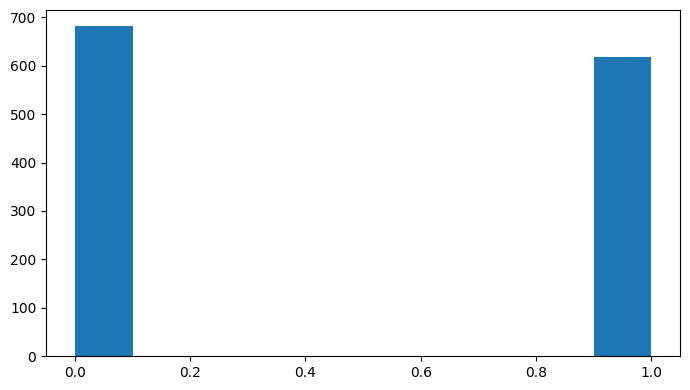

In [8]:
fig, axs = plt.subplots(1, 1,
                        figsize =(7, 4),
                        tight_layout = True)
axs.hist(data['Target'])
plt.show()

# Task 2 - Data Preprocessing


*   Preprocess the dataset to ensure consistency and remove any
unnecessary characters or noise.
*   Tokenize the names into individual letters or n-grams (character
sequences) for feature extraction.
*   Shuffle the dataset to randomize the order of names.



In [9]:
data['Name'] = data['Name'].str.lower()
regex = re.compile('[^a-zA-Z]')
data['Name'] = data['Name'].apply(lambda x: regex.sub('',x))

In [10]:
data.duplicated(keep=False).sum()

220

In [11]:
data = data.drop_duplicates(keep='last')

In [12]:
data['Name'].isna().sum()

0

In [13]:
data['Target'].isna().sum()

0

In [14]:
data.shape

(1183, 2)

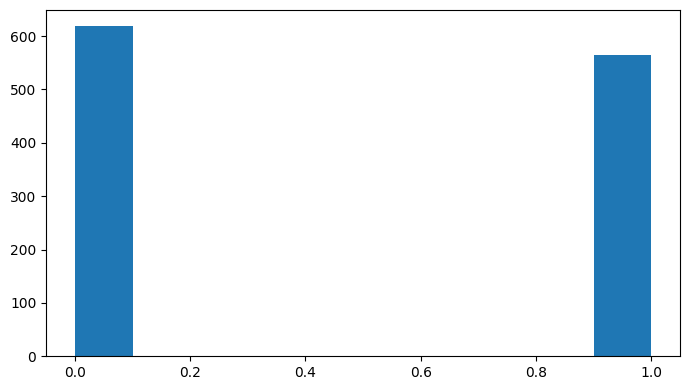

In [15]:
fig, axs = plt.subplots(1, 1,
                        figsize =(7, 4),
                        tight_layout = True)
axs.hist(data['Target'])
plt.show()

# Task 3: Feature Extraction

*   Extract features from the preprocessed names. You can use techniques
like character n-grams (e.g., bi-grams or tri-grams) as features.
*   Create a feature matrix where each row represents a name, and each
column represents a feature.



In [16]:
ngram_range = (2, 3)
vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
# vectorizer = TfidfVectorizer(analyzer='char', ngram_range=ngram_range)
X = vectorizer.fit_transform(data['Name'])

In [17]:
filename = '/pickle/train_data_vector.pkl'
pickle.dump(vectorizer,open(filename,'wb'))

In [18]:
feature_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [19]:
feature_matrix.shape

(1183, 1632)

In [20]:
target_column = data['Target']

In [21]:
target_column = target_column.reset_index(drop=True)
feature_matrix = feature_matrix.reset_index(drop=True)

In [22]:
feature_matrix['Target'] = target_column

# Task 4: Model Training

*   Choose a machine learning algorithm (e.g., logistic regression,
decision tree, or a simple neural network) and train it on the feature
matrix and corresponding gender labels from the dataset.
*   Split the dataset into a training set and a testing set to evaluate
the model's performance.



In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    feature_matrix.drop(columns=['Target']),
    feature_matrix['Target'],
    test_size=0.2,
    random_state=42,
    shuffle = True
)

In [24]:
logistic_regression_model = LogisticRegression(solver = 'liblinear')
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [25]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Task 5: Model Evaluation


*   Evaluate the model's performance on the testing set using metrics such as accuracy, precision, recall, and F1-score.
*   Report the results and discuss the strengths and weaknesses of your model.


In [27]:
y_pred = logistic_regression_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7974683544303798


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       114
           1       0.83      0.77      0.80       123

    accuracy                           0.80       237
   macro avg       0.80      0.80      0.80       237
weighted avg       0.80      0.80      0.80       237



In [29]:
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6708860759493671


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66       114
           1       0.69      0.67      0.68       123

    accuracy                           0.67       237
   macro avg       0.67      0.67      0.67       237
weighted avg       0.67      0.67      0.67       237



In [31]:
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6877637130801688


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       114
           1       0.73      0.63      0.68       123

    accuracy                           0.69       237
   macro avg       0.69      0.69      0.69       237
weighted avg       0.69      0.69      0.69       237



* Logistic regression, Random Forest and Decision tree have precision and recall both balanced which showcases that it shows less chances of false positives and false negatives.
* Comparing Logistic regression, Random Forest and Decision tree as the accuracy is more for Logistic regression we can expect greater chances of right prediction.

# Task 6: User-Friendly Interface

* As an optional task, create a simple command-line interface (CLI)
where users can input a name, and your model can predict the likely
gender associated with that name.

In [33]:
def predict_gender(input_name, model, vectorizer):
    gender = []
    regex = re.compile('[^a-zA-Z]')
    input_names = [name.lower() for name in input_name]
    input_names = [regex.sub('',name) for name in input_names]
    input_features = vectorizer.transform(input_names)
    predicted_gender = model.predict(input_features)
    for i in range(0,len(predicted_gender)):
      if predicted_gender[i] == 0:
        gender.append('Female')
      elif predicted_gender[i] == 1:
         gender.append('Male')
    return gender

In [34]:
input_arr = [str(x) for x in input("Enter multiple values: ").split(',')]

In [35]:
predicted_genders_log = predict_gender(input_arr,logistic_regression_model,vectorizer)

c:\Users\munga\Documents\Personal_Projects\Gender Classification\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:
predicted_genders_tree = predict_gender(input_arr,decision_tree_model,vectorizer)

c:\Users\munga\Documents\Personal_Projects\Gender Classification\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
predicted_genders_rf = predict_gender(input_arr,random_forest_model,vectorizer)

c:\Users\munga\Documents\Personal_Projects\Gender Classification\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [38]:
for name, gender in zip(input_arr, predicted_genders_log):
    print(f"Predicted gender for '{name}': {gender}")

Predicted gender for 'Sudeep': Male
Predicted gender for 'Navya': Female
Predicted gender for 'Nikhil': Male
Predicted gender for 'Aslam': Female
Predicted gender for 'Satya': Female
Predicted gender for 'Alay': Male
Predicted gender for 'Saptarshi': Female


In [39]:
for name, gender in zip(input_arr, predicted_genders_tree):
    print(f"Predicted gender for '{name}': {gender}")

Predicted gender for 'Sudeep': Male
Predicted gender for 'Navya': Female
Predicted gender for 'Nikhil': Male
Predicted gender for 'Aslam': Female
Predicted gender for 'Satya': Female
Predicted gender for 'Alay': Male
Predicted gender for 'Saptarshi': Male


In [40]:
for name, gender in zip(input_arr, predicted_genders_rf):
    print(f"Predicted gender for '{name}': {gender}")

Predicted gender for 'Sudeep': Male
Predicted gender for 'Navya': Female
Predicted gender for 'Nikhil': Male
Predicted gender for 'Aslam': Female
Predicted gender for 'Satya': Female
Predicted gender for 'Alay': Male
Predicted gender for 'Saptarshi': Male


In [41]:
log_param_grid = {
    'C': [0.1, 0.5,1.0],
    'max_iter': [80,100, 200, 300],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2','elasticnet']
}

In [42]:
logistic_regression = LogisticRegression()
grid_search = GridSearchCV(logistic_regression, log_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

c:\Users\munga\Documents\Personal_Projects\Gender Classification\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\munga\Documents\Personal_Projects\Gender Classification\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\munga\Documents\Personal_Projects\Gender Classification\venv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\munga\Documents

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1.0], 'max_iter': [80, 100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [43]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

log_best_model = grid_search.best_estimator_
y_pred = log_best_model.predict(X_test)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'C': 1.0, 'max_iter': 80, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       114
           1       0.85      0.79      0.82       123

    accuracy                           0.82       237
   macro avg       0.82      0.82      0.82       237
weighted avg       0.82      0.82      0.82       237



In [44]:
filename = '/pickle/gender_classification_model.pkl'
pickle.dump(log_best_model,open(filename,'wb'))

In [45]:
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 40 , 60],
    'splitter':['best','random'],
    'min_samples_split': [1,2, 5, 10, 20, 50, 70],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

In [46]:
decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree, tree_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

c:\Users\munga\Documents\Personal_Projects\Gender Classification\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
700 fits failed out of a total of 4900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
700 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\munga\Documents\Personal_Projects\Gender Classification\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\munga\Documents\Personal_Projects\Gender Classification\venv\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\munga\Documents\Personal_Proje

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 40, 60],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [1, 2, 5, 10, 20, 50, 70],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [47]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
tree_best_model = grid_search.best_estimator_
y_pred = tree_best_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'best'}
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.71      0.66       114
           1       0.68      0.58      0.63       123

    accuracy                           0.64       237
   macro avg       0.65      0.64      0.64       237
weighted avg       0.65      0.64      0.64       237



In [48]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4]
}

In [49]:
random_forest = RandomForestClassifier()
grid_search = GridSearchCV(random_forest, rf_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [50]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
rf_best_model = grid_search.best_estimator_
y_pred = rf_best_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       114
           1       0.74      0.63      0.68       123

    accuracy                           0.69       237
   macro avg       0.70      0.69      0.69       237
weighted avg       0.70      0.69      0.69       237



In [51]:
predicted_genders_log_cv = predict_gender(input_arr,log_best_model,vectorizer)

c:\Users\munga\Documents\Personal_Projects\Gender Classification\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [52]:
predicted_genders_tree_cv = predict_gender(input_arr,tree_best_model,vectorizer)

c:\Users\munga\Documents\Personal_Projects\Gender Classification\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [53]:
predicted_genders_rf_cv = predict_gender(input_arr,rf_best_model,vectorizer)

c:\Users\munga\Documents\Personal_Projects\Gender Classification\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [54]:
for name, gender in zip(input_arr, predicted_genders_log_cv):
    print(f"Predicted gender for '{name}': {gender}")

Predicted gender for 'Sudeep': Male
Predicted gender for 'Navya': Female
Predicted gender for 'Nikhil': Male
Predicted gender for 'Aslam': Male
Predicted gender for 'Satya': Female
Predicted gender for 'Alay': Male
Predicted gender for 'Saptarshi': Female


In [55]:
for name, gender in zip(input_arr, predicted_genders_tree_cv):
    print(f"Predicted gender for '{name}': {gender}")

Predicted gender for 'Sudeep': Male
Predicted gender for 'Navya': Female
Predicted gender for 'Nikhil': Male
Predicted gender for 'Aslam': Female
Predicted gender for 'Satya': Female
Predicted gender for 'Alay': Male
Predicted gender for 'Saptarshi': Male


In [56]:
for name, gender in zip(input_arr, predicted_genders_rf_cv):
    print(f"Predicted gender for '{name}': {gender}")

Predicted gender for 'Sudeep': Male
Predicted gender for 'Navya': Female
Predicted gender for 'Nikhil': Male
Predicted gender for 'Aslam': Female
Predicted gender for 'Satya': Female
Predicted gender for 'Alay': Female
Predicted gender for 'Saptarshi': Male
